In [1]:
# Install packages
!pip install pandas numpy matplotlib seaborn scikit-learn imbalanced-learn

In [2]:
# Import necessary libraries

import pickle
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.utils.class_weight import compute_sample_weight
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score, recall_score, f1_score

In [30]:
df = pd.read_csv('cancer_data.csv')
df

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Level
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,Low
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,Medium
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,High
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,P995,44,1,6,7,7,7,7,6,7,...,5,3,2,7,8,2,4,5,3,High
996,P996,37,2,6,8,7,7,7,6,7,...,9,6,5,7,2,4,3,1,4,High
997,P997,25,2,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,High
998,P998,18,2,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,High


In [31]:
n_treatments = 3

treatment_list = [
    'Pembrolizumab',
    'CAR T-cell Therapy',
    'Chemotherapy'
]

# df['labels'] = np.random.randint(0, n_treatments, size=(len(df)))
# df

In [32]:

encoder = LabelEncoder()

categorical_cols = ['Level']
for column in categorical_cols:
    df[column] = encoder.fit_transform(df[column])

In [33]:
X = df.drop(['Patient Id', 'Level'], axis=1)
y = df['Level']

In [34]:
X.shape

(1000, 23)

In [35]:
df.rename(columns={'Level': 'Label'}, inplace=True)

In [36]:
df.iloc[:5]

,Patient Id,Age,Gender,Air Pollution,Alcohol use,Dust Allergy,OccuPational Hazards,Genetic Risk,chronic Lung Disease,Balanced Diet,...,Fatigue,Weight Loss,Shortness of Breath,Wheezing,Swallowing Difficulty,Clubbing of Finger Nails,Frequent Cold,Dry Cough,Snoring,Label
0,P1,33,1,2,4,5,4,3,2,2,...,3,4,2,2,3,1,2,3,4,1
1,P10,17,1,3,1,5,3,4,2,2,...,1,3,7,8,6,2,1,7,2,2
2,P100,35,1,4,5,6,5,5,4,6,...,8,7,9,2,1,4,6,7,2,0
3,P1000,37,1,7,7,7,7,6,7,7,...,4,2,3,1,4,5,6,7,5,0
4,P101,46,1,6,8,7,7,7,6,7,...,3,2,4,1,4,2,4,2,3,0


In [47]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [11]:
param_grid = {
    'n_estimators': [100, 200, 500, 1000]
}

In [12]:
clf = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=0)

grid_search = GridSearchCV(clf, param_grid=param_grid, n_jobs=-1, verbose=1)
grid_search.fit(x_train, y_train)

model_ = grid_search.best_estimator_
print(f'Best model = {model_.get_params()}')

y_pred = model_.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
# Weighter F1-Score
f1 = f1_score(y_test, y_pred, average='weighted')
print(f'Accuracy: {accuracy:.2f}')
print(f'Weighted F1-Score: {f1:.2f}')

one_hot_matrix = np.zeros((y_test.size, n_treatments), dtype=int)
one_hot_matrix[np.arange(y_test.size), y_test] = 1
# Predict probabilities
y_pred_p = model_.predict_proba(x_test)
# Calculate Cross-Entropy Loss (Negative Log-Likelihood)
cross_entropy_loss = log_loss(one_hot_matrix, y_pred_p)
print(f'Cross-Entropy Loss: {cross_entropy_loss:.2f}')

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best model = {'bootstrap': True, 'ccp_alpha': 0.0, 'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': None, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'monotonic_cst': None, 'n_estimators': 100, 'n_jobs': -1, 'oob_score': False, 'random_state': 0, 'verbose': 0, 'warm_start': False}
Accuracy: 1.00
Weighted F1-Score: 1.00
Cross-Entropy Loss: 0.00


In [13]:
model_.feature_importances_

array([0.00707173, 0.00082031, 0.03090494, 0.05085086, 0.0424631 ,
       0.03744952, 0.04231006, 0.0150477 , 0.02937667, 0.10334305,
       0.03797558, 0.09368972, 0.03045466, 0.1002006 , 0.05365423,
       0.03325493, 0.03644651, 0.07579376, 0.04095895, 0.04238973,
       0.02839033, 0.02054141, 0.04661163])

In [48]:
one_hot_train = np.zeros((y_train.size, n_treatments), dtype=int)
one_hot_train[np.arange(y_train.size), y_train] = 1

one_hot_test = np.zeros((y_test.size, n_treatments), dtype=int)
one_hot_test[np.arange(y_test.size), y_test] = 1

In [49]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

def create_model():
    model = Sequential([
        Dense(64, activation='relu', input_shape=(23,)),
        Dense(64, activation='relu'),
        Dense(32, activation='relu'),
        Dense(3, activation='softmax')  # Adjust the output layer based on the number of classes
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model

# Initialize and train the model on the initial data
model = create_model()
model.fit(x_train, one_hot_train, epochs=10, batch_size=32, validation_data=(x_test, one_hot_test))

# Function to simulate feedback
def simulate_feedback(x_feedback, y_feedback, model, epochs=2):
    global x_train, one_hot_train
    x_train = np.concatenate((x_train, x_feedback))
    one_hot_train = np.concatenate((one_hot_train, y_feedback))
    model.fit(x_train, one_hot_train, epochs=epochs, batch_size=32, validation_data=(x_test, one_hot_test))

# Simulate feedback by randomly selecting samples from x_test as "newly labeled data"
num_feedback_samples = 10

# try:
feedback_indices = np.random.choice(len(x_test), num_feedback_samples, replace=False)

# Selecting feedback samples by row indices for both features and labels
x_feedback = x_test.to_numpy()[feedback_indices]  # Get the rows by feedback indices
y_feedback = one_hot_test[feedback_indices]

# Apply feedback to the model
simulate_feedback(x_feedback, y_feedback, model)
# except:
#   pass

# Evaluate the model after feedback
test_loss, test_accuracy = model.evaluate(x_test, one_hot_test)
print(f"Test accuracy after feedback loop: {test_accuracy * 100:.2f}%")

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - accuracy: 0.4437 - loss: 1.3304 - val_accuracy: 0.6700 - val_loss: 0.6530
Epoch 2/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7873 - loss: 0.5791 - val_accuracy: 0.8300 - val_loss: 0.5113
Epoch 3/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.8492 - loss: 0.4615 - val_accuracy: 0.8800 - val_loss: 0.3867
Epoch 4/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9023 - loss: 0.3549 - val_accuracy: 0.9500 - val_loss: 0.3063
Epoch 5/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9424 - loss: 0.2496 - val_accuracy: 0.9000 - val_loss: 0.2615
Epoch 6/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9426 - loss: 0.2093 - val_accuracy: 0.9700 - val_loss: 0.1647
Epoch 7/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9699 - loss: 0.1383 - val_accuracy: 0.9800 - val_loss: 0.1204
Epoch 8/10
29/29 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9818 - loss: 0.1001 - val_accuracy: 0.9700 - val_loss: 0.0931
Ep

In [16]:
pred = model.predict(x_test.iloc[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step


In [17]:
for y in np.argmax(pred, axis=1):
  print(treatment_list[y])

Pembrolizumab
Chemotherapy
Chemotherapy
Pembrolizumab
CAR T-cell Therapy


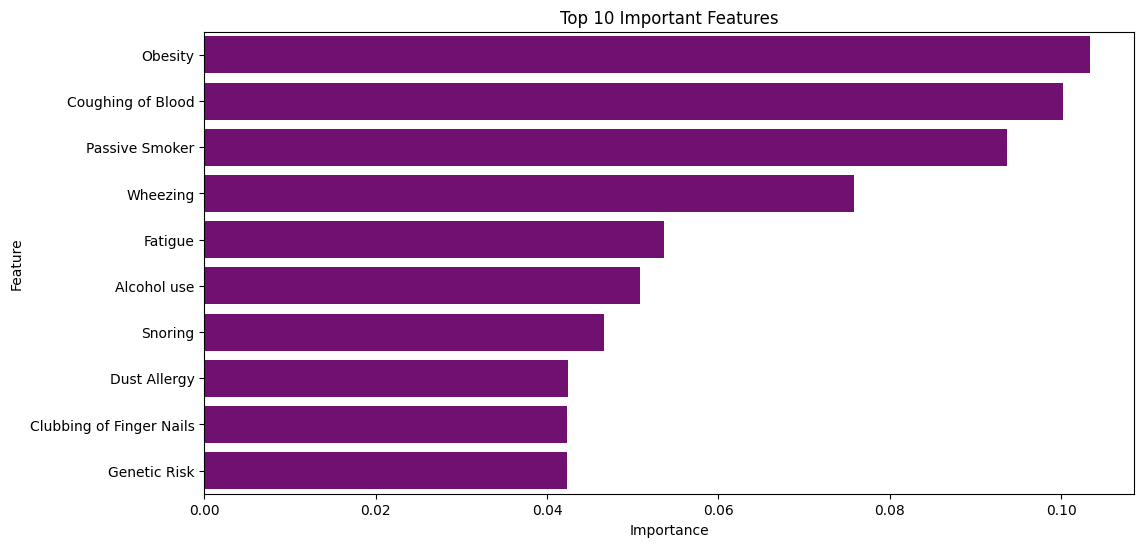

In [19]:
importances = model_.feature_importances_

# Combine with additional features
# Assuming Col3 and Col7 are numeric features you included
feature_names = df.columns.tolist()
feature_names.remove('Label')
feature_names.remove('Patient Id')

# Create a DataFrame
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort the DataFrame by importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 6))
sns.barplot(data=importance_df.head(10), x='Importance', y='Feature', color='purple')
plt.title('Top 10 Important Features')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

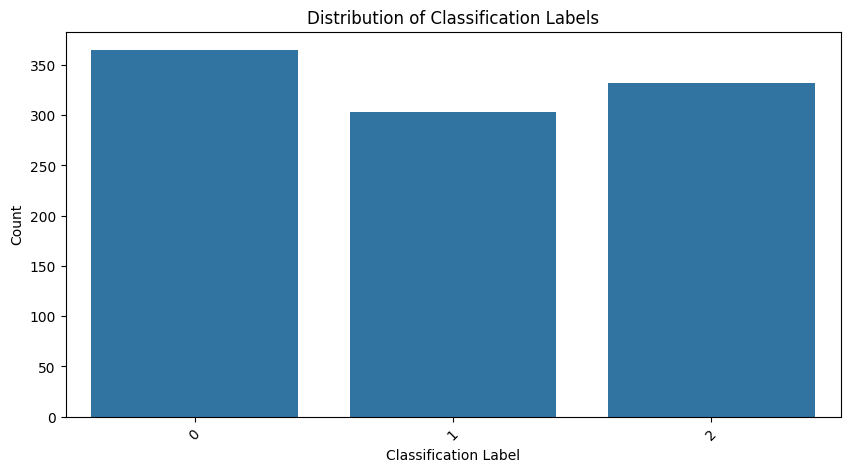

In [21]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Label')
plt.title('Distribution of Classification Labels')
plt.xlabel('Classification Label')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

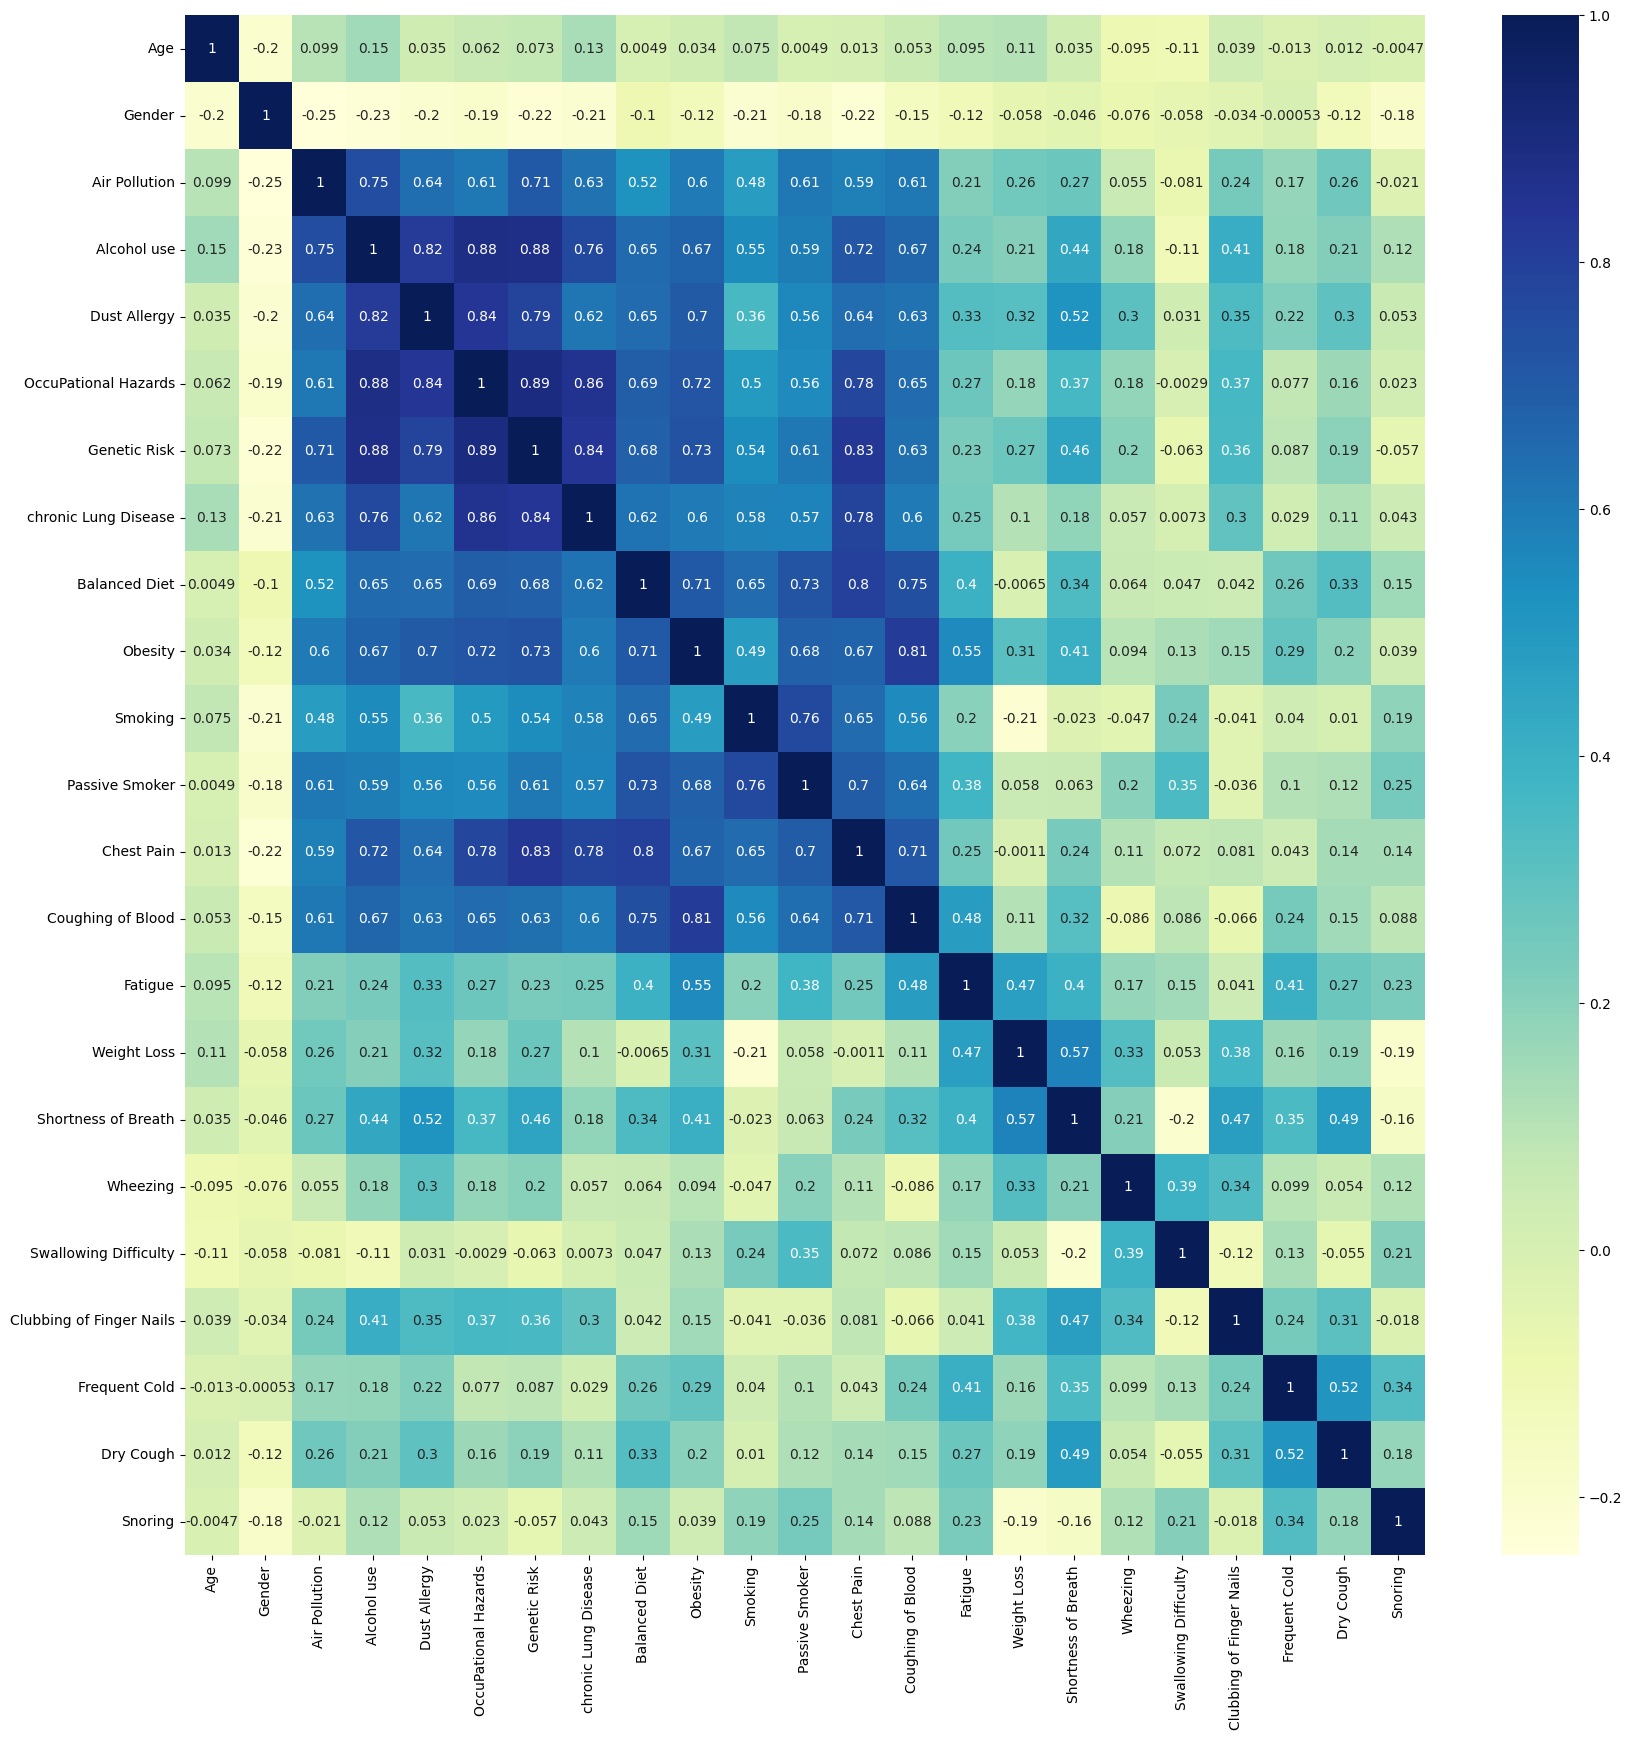

In [28]:
# plt.figure(figsize=(20, 20))
# sns.heatmap(X.corr(), cmap="YlGnBu", annot=True)
# plt.savefig('corr.png', dpi=300)
# plt.show()